In [79]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [80]:
#Reading the data

df = pd.read_csv(r"C:\Users\chaud\OneDrive\Desktop\Python\Assesment on ML\House Price Prediction\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [81]:
#Checking the features in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [82]:
# check null value in the dataset
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### There are total 13320 records in the data and missing value is available in the data.

### Univariant Analysis

#### 1. Area_Type

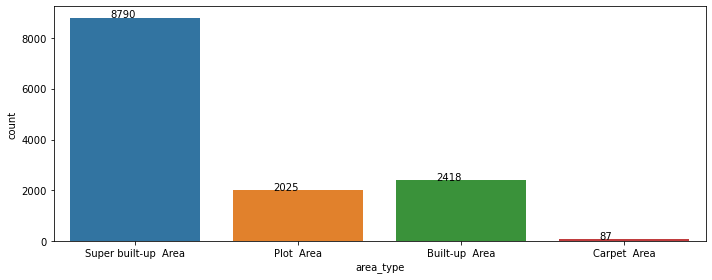

In [83]:
plt.rcParams["figure.figsize"] = [10,4]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="area_type", data=df)

for p in ax.patches:
    
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))

plt.show()

#### 2. Availability

In [84]:
df.availability.value_counts()

Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                     16
Immediate Possession       16
20-Aug                     16
19-Oct                     15
21-Mar                     14
17-Jun                     13
21-May    

In [85]:
def ReliableAvailability(x):
    values = x.split("-")
    try:
        if len(values) > 1:
            return "Soon to be Vacated"
        else:
            return x
    except:
            return ""

In [86]:
df["availability"] = df["availability"].apply(ReliableAvailability)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability', ylabel='count'>

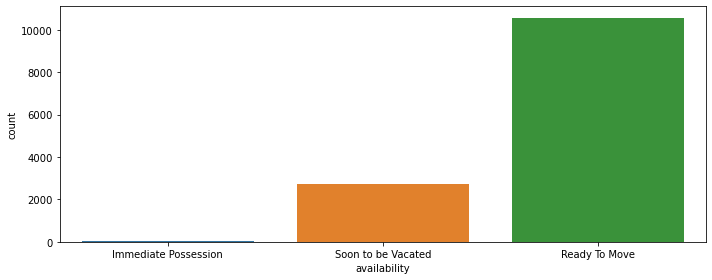

In [87]:
sns.countplot(df["availability"], order=df["availability"].value_counts(ascending=True).index)

### 3. Location

In [88]:
# location have bull value
df[pd.isnull(df["location"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [89]:
# finding the society name Grare S
df[df["society"] == "Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [90]:
# As Grare S society is in Anantapura hence replace null value of location with this value
df["location"] =  df["location"].replace(to_replace = np.nan, value = "Anantapura")

In [91]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [92]:
location_stats.values.sum()

13320

In [93]:
len(location_stats[location_stats>10])

241

In [94]:
len(location_stats)

1294

In [95]:
len(location_stats[location_stats<=10])

1053

### Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [96]:
location_stats_less_than_10 = location_stats[location_stats<=10]
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [97]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,Soon to be Vacated,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,other,6 Bedroom,NaN,1020,6.0,NaN,370.00


#### 4. Size

##### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [98]:
# size have null value, we drop that null value rows
df[pd.isnull(df["size"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,other,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [99]:
df=df.dropna(subset = ["size"])

In [100]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [101]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4


In [102]:
# as size colume is replace by bhk using feature engineering and location have high percentage of null value hence we remove that columns
df=df.drop(columns=["size", "society"])

#### 5. Bath_room

In [103]:
bhk_groupby_bathroom = df.groupby("bhk")["bath"].value_counts()
bhk_groupby_bathroom

bhk  bath
1    1.0      609
     2.0       40
2    2.0     5286
     1.0      176
     3.0       61
     4.0        4
3    3.0     2981
     2.0     1515
     4.0      298
     5.0       35
     1.0        2
     6.0        2
4    4.0      779
     5.0      267
     3.0      199
     6.0       84
     2.0       62
     8.0        2
     1.0        1
     7.0        1
5    5.0      173
     4.0       97
     6.0       33
     3.0       30
     7.0       15
     2.0        4
     8.0        1
6    6.0      116
     4.0       34
     5.0       31
     7.0       16
     3.0       12
     8.0        9
     9.0        3
7    7.0       50
     6.0       16
     5.0       13
     4.0        8
     8.0        5
     9.0        5
     3.0        2
     2.0        1
8    8.0       37
     7.0       16
     6.0       14
     4.0        6
     9.0        5
     5.0        4
     10.0       3
     12.0       3
     3.0        1
9    9.0       27
     8.0        9
     6.0        6
     10.0       4


In [104]:
def fcnFillBathrooms(bhk_groupby_bathroom, row):
    if pd.isnull(row["bath"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["bath"])

In [105]:
df["bath"] =df.apply(lambda row: fcnFillBathrooms(bhk_groupby_bathroom, row), axis=1)
bhk_groupby_bathroom = df.groupby("bhk")["bath"].value_counts()
bhk_groupby_bathroom

bhk  bath
1    1        616
     2         40
2    2       5287
     1        176
     3         61
     4          4
3    3       3005
     2       1515
     4        298
     5         35
     1          2
     6          2
4    4        801
     5        267
     3        199
     6         84
     2         62
     8          2
     1          1
     7          1
5    5        176
     4         97
     6         33
     3         30
     7         15
     2          4
     8          1
6    6        116
     4         34
     5         31
     7         16
     3         12
     8          9
     9          3
7    7         50
     6         16
     5         13
     4          8
     8          5
     9          5
     3          2
     2          1
8    8         37
     7         16
     6         14
     4          6
     9          5
     5          4
     10         3
     12         3
     3          1
9    9         27
     8          9
     6          6
     10         4


### 6. Balcony

In [106]:
bhk_groupby_balcony = df.groupby("bhk")["balcony"].value_counts()
bhk_groupby_balcony

bhk  balcony
1    1.0         425
     0.0         186
     2.0          35
     3.0           2
2    1.0        2735
     2.0        2062
     0.0         355
     3.0         328
3    2.0        2331
     1.0        1245
     3.0         861
     0.0         219
4    2.0         458
     1.0         324
     3.0         287
     0.0         169
5    2.0         100
     1.0          95
     3.0          65
     0.0          39
6    2.0          69
     3.0          57
     1.0          39
     0.0          27
7    3.0          33
     2.0          27
     1.0          15
     0.0          10
8    2.0          23
     3.0          20
     0.0          15
     1.0          10
9    3.0          14
     1.0           9
     2.0           7
     0.0           4
10   3.0           3
11   3.0           2
     0.0           1
12   2.0           1
13   0.0           1
14   0.0           1
27   0.0           1
43   0.0           1
Name: balcony, dtype: int64

In [107]:
def fcnFillBalcony(bhk_groupby_balcony, row):
    if pd.isnull(row["balcony"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["balcony"])

In [108]:
df["balcony"] = df.apply(lambda row: fcnFillBalcony(bhk_groupby_balcony, row), axis=1)
bhk_groupby_balcony = df.groupby("bhk")["balcony"].value_counts()
bhk_groupby_balcony

bhk  balcony
1    1           433
     0           186
     2            35
     3             2
2    1          2735
     2          2110
     0           355
     3           328
3    2          2331
     1          1245
     3          1062
     0           219
4    2           458
     1           324
     3           287
     4           179
     0           169
5    2           100
     1            95
     3            65
     5            57
     0            39
6    2            69
     3            57
     1            39
     6            29
     0            27
7    3            33
     2            27
     1            15
     7            15
     0            10
8    2            23
     8            21
     3            20
     0            15
     1            10
9    9            20
     3            14
     1             9
     2             7
     0             4
10   10           11
     3             3
11   3             2
     0             1
     6             1


### Check null value in dataset

In [109]:
df.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

#### 7. Total_sqft

In [110]:
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df["total_sqft"].apply(fcnIsFloat)].head(2)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Soon to be Vacated,Yelahanka,2100 - 2850,4,0,186.0,4
56,Built-up Area,Soon to be Vacated,Devanahalli,3010 - 3410,4,4,192.0,4


In [111]:
metrics = []

def fcnConvertToSqFt(x, metric):
    if metric == "Acres":
        return x * 43560
    elif metric == "Cents":
        return x * 435.6
    elif metric == "Grounds":
        return x * 2400
    elif metric == "Guntha":
        return x * 1088.98
    elif metric == "Perch":
        return x * 272.25
    elif metric == "Sq. Meter":
        return x * 10.7639
    elif metric == "Sq. Yards":
        return x * 9
    else:
        return np.nan

def fcnExtractTotalSqft(x):
    try:
        values = x.split("-")
        return np.mean(list(map(float, values)))
    except:
        if x == np.nan:
            return np.nan
        else:
            for intIndex in range(len(x)-1, -1, -1):
                if fcnIsFloat(x[0:intIndex]):
                    return fcnConvertToSqFt(float(x[0:intIndex]), x[intIndex:])

In [112]:
df["total_sqft"] = df["total_sqft"].apply(fcnExtractTotalSqft)
df.head(2)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,1056.0,2,1,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5,3,120.00,4


### Added a feature "price_per_sqft" and "sqft_per_bhk" that can help to detect outliers

In [113]:
df["price_per_sqft"] = df["price"] * 100000 / df["total_sqft"]
df["sqft_per_bhk"] = df["total_sqft"] / df["bhk"]
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606,528.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615,650.0
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2,3,62.00,3,4305.555556,480.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861,507.0
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2,1,51.00,2,4250.000000,600.0


### Outlier Removal

In [114]:
## Removing samples that show sqft_per_room to be less than 300 and
## more than 1500 as it looks like an outlier when kde is analyzed
df = df[~(df["sqft_per_bhk"] < 300)]
df = df[~(df["sqft_per_bhk"] > 1200)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_per_bhk', ylabel='Density'>

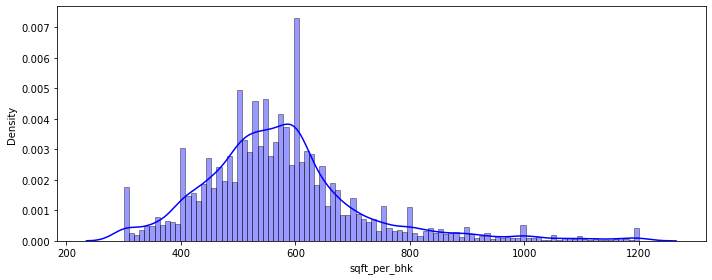

In [115]:
sns.distplot(df["sqft_per_bhk"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [116]:
### remove outliers for the bathroom
### general maximum 2 bathroom is extra for the bhk value hence greater than BHk + 2 bathroom is the outliers of the data for us
### and bathroom is not less than bedroom hence that are also consider outliers
df=df[df.bath<df.bhk+2]
df =df[df.bath>=df.bhk]

In [117]:
df.shape

(10265, 10)

### Outliers removal using standard deviation and Mean

In [118]:
df.price_per_sqft.describe()

count     10265.000000
mean       6205.098978
std        3801.889031
min         500.000000
25%        4262.295082
50%        5319.148936
75%        6875.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

### Here we find that min price per sqft is 500 rs/sqft whereas max is 12000000, this shows a wide variation in property prices.
### We should remove outliers per location using mean and one standard deviation.

In [119]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(8244, 10)

In [120]:
df.columns

Index(['area_type', 'availability', 'location', 'total_sqft', 'bath',
       'balcony', 'price', 'bhk', 'price_per_sqft', 'sqft_per_bhk'],
      dtype='object')

In [121]:
## Note we create price per sqft and sqft per bhk to remove outliers of our data hence we don't need it now.
df=df.drop(columns=["price_per_sqft", "sqft_per_bhk"])

### Find correlation between the target variable and Predictor variable

In [122]:
df.corr()

,total_sqft,bath,balcony,price,bhk
total_sqft,1.000000,0.830407,0.421606,0.820819,0.817202
bath,0.830407,1.000000,0.411267,0.665154,0.970794
balcony,0.421606,0.411267,1.000000,0.317103,0.424590
price,0.820819,0.665154,0.317103,1.000000,0.634349
bhk,0.817202,0.970794,0.424590,0.634349,1.000000


1. from correlation matrix we can see that there is strong positive correlation between the price and total_sqft
2. There is multicolinearity present in the data.
3. There is weak correlation between balcony and price hence we can remove it.

In [123]:
df=df.drop(columns=["balcony"])
df.shape

(8244, 7)

In [124]:
### Numerical Columns
data_num =df[df.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head()

,total_sqft,bath,price,bhk
0,2850.0,4,428.0,4
1,1630.0,3,194.0,3
2,1235.0,2,148.0,2
3,2750.0,4,413.0,4
4,2450.0,4,368.0,4


In [125]:
#categorical columns
data_cat =df[df.select_dtypes(include=["object"]).columns.tolist()]
data_cat.head()

,area_type,availability,location
0,Super built-up Area,Soon to be Vacated,1st Block Jayanagar
1,Super built-up Area,Soon to be Vacated,1st Block Jayanagar
2,Super built-up Area,Soon to be Vacated,1st Block Jayanagar
3,Super built-up Area,Soon to be Vacated,1st Block Jayanagar
4,Super built-up Area,Soon to be Vacated,1st Block Jayanagar


In [126]:
# use one hot encoding for categorical data
dummies = pd.get_dummies(data_cat)
dummies.head(3)

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,availability_Soon to be Vacated,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,location_AECS Layout,location_Abbigere,location_Akshaya Nagar,location_Ambalipura,location_Ambedkar Nagar,location_Amruthahalli,location_Anandapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Ardendale,location_Arekere,location_Attibele,location_BEML Layout,location_BTM 2nd Stage,location_BTM Layout,location_Babusapalaya,location_Badavala Nagar,location_Balagere,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,location_Bannerghatta,location_Bannerghatta Road,location_Basavangudi,location_Basaveshwara Nagar,location_Battarahalli,location_Begur,location_Begur Road,location_Bellandur,location_Benson Town,location_Bharathi Nagar,location_Bhoganhalli,location_Billekahalli,location_Binny Pete,location_Bisuvanahalli,location_Bommanahalli,location_Bommasandra,location_Bommasandra Industrial Area,location_Bommenahalli,location_Brookefield,location_Budigere,location_CV Raman Nagar,location_Chamrajpet,location_Chandapura,location_Channasandra,location_Chikka Tirupathi,location_Chikkabanavar,location_Chikkalasandra,location_Choodasandra,location_Cooke Town,location_Cox Town,location_Cunningham Road,location_Dasanapura,location_Dasarahalli,location_Devanahalli,location_Devarachikkanahalli,location_Dodda Nekkundi,location_Doddaballapur,location_Doddakallasandra,location_Doddathoguru,location_Domlur,location_Dommasandra,location_EPIP Zone,location_Electronic City,location_Electronic City Phase II,location_Electronics City Phase 1,location_Frazer Town,location_GM Palaya,location_Garudachar Palya,location_Giri Nagar,location_Gollarapalya Hosahalli,location_Gottigere,location_Green Glen Layout,location_Gubbalala,location_Gunjur,location_HAL 2nd Stage,location_HBR Layout,location_HRBR Layout,location_HSR Layout,location_Haralur Road,location_Harlur,location_Hebbal,location_Hebbal Kempapura,location_Hegde Nagar,location_Hennur,location_Hennur Road,location_Hoodi,location_Horamavu Agara,location_Horamavu Banaswadi,location_Hormavu,location_Hosa Road,location_Hosakerehalli,location_Hoskote,location_Hosur Road,location_Hulimavu,location_ISRO Layout,location_ITPL,location_Iblur Village,location_Indira Nagar,location_JP Nagar,location_Jakkur,location_Jalahalli,location_Jalahalli East,location_Jigani,location_Judicial Layout,location_KR Puram,location_Kadubeesanahalli,location_Kadugodi,location_Kaggadasapura,location_Kaggalipura,location_Kaikondrahalli,location_Kalena Agrahara,location_Kalyan nagar,location_Kambipura,location_Kammanahalli,location_Kammasandra,location_Kanakapura,location_Kanakpura Road,location_Kannamangala,location_Karuna Nagar,location_Kasavanhalli,location_Kasturi Nagar,location_Kathriguppe,location_Kaval Byrasandra,location_Kenchenahalli,location_Kengeri,location_Kengeri Satellite Town,location_Kereguddadahalli,location_Kodichikkanahalli,location_Kodigehaali,location_Kodigehalli,location_Kodihalli,location_Kogilu,location_Konanakunte,location_Koramangala,location_Kothannur,location_Kothanur,location_Kudlu,location_Kudlu Gate,location_Kumaraswami Layout,location_Kundalahalli,location_LB Shastri Nagar,location_Laggere,location_Lakshminarayana Pura,location_Lingadheeranahalli,location_Magadi Road,location_Mahadevpura,location_Mahalakshmi Layout,location_Mallasandra,location_Malleshpalya,location_Malleshwaram,location_Marathahalli,location_Margondanahalli,location_Marsur,location_Mico Layout,location_Munnekollal,location_Murugeshpalya,l

In [127]:
Final_combined = pd.concat([data_num, dummies],axis=1)
Final_combined.head()

,total_sqft,bath,price,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,availability_Soon to be Vacated,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,location_AECS Layout,location_Abbigere,location_Akshaya Nagar,location_Ambalipura,location_Ambedkar Nagar,location_Amruthahalli,location_Anandapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Ardendale,location_Arekere,location_Attibele,location_BEML Layout,location_BTM 2nd Stage,location_BTM Layout,location_Babusapalaya,location_Badavala Nagar,location_Balagere,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,location_Bannerghatta,location_Bannerghatta Road,location_Basavangudi,location_Basaveshwara Nagar,location_Battarahalli,location_Begur,location_Begur Road,location_Bellandur,location_Benson Town,location_Bharathi Nagar,location_Bhoganhalli,location_Billekahalli,location_Binny Pete,location_Bisuvanahalli,location_Bommanahalli,location_Bommasandra,location_Bommasandra Industrial Area,location_Bommenahalli,location_Brookefield,location_Budigere,location_CV Raman Nagar,location_Chamrajpet,location_Chandapura,location_Channasandra,location_Chikka Tirupathi,location_Chikkabanavar,location_Chikkalasandra,location_Choodasandra,location_Cooke Town,location_Cox Town,location_Cunningham Road,location_Dasanapura,location_Dasarahalli,location_Devanahalli,location_Devarachikkanahalli,location_Dodda Nekkundi,location_Doddaballapur,location_Doddakallasandra,location_Doddathoguru,location_Domlur,location_Dommasandra,location_EPIP Zone,location_Electronic City,location_Electronic City Phase II,location_Electronics City Phase 1,location_Frazer Town,location_GM Palaya,location_Garudachar Palya,location_Giri Nagar,location_Gollarapalya Hosahalli,location_Gottigere,location_Green Glen Layout,location_Gubbalala,location_Gunjur,location_HAL 2nd Stage,location_HBR Layout,location_HRBR Layout,location_HSR Layout,location_Haralur Road,location_Harlur,location_Hebbal,location_Hebbal Kempapura,location_Hegde Nagar,location_Hennur,location_Hennur Road,location_Hoodi,location_Horamavu Agara,location_Horamavu Banaswadi,location_Hormavu,location_Hosa Road,location_Hosakerehalli,location_Hoskote,location_Hosur Road,location_Hulimavu,location_ISRO Layout,location_ITPL,location_Iblur Village,location_Indira Nagar,location_JP Nagar,location_Jakkur,location_Jalahalli,location_Jalahalli East,location_Jigani,location_Judicial Layout,location_KR Puram,location_Kadubeesanahalli,location_Kadugodi,location_Kaggadasapura,location_Kaggalipura,location_Kaikondrahalli,location_Kalena Agrahara,location_Kalyan nagar,location_Kambipura,location_Kammanahalli,location_Kammasandra,location_Kanakapura,location_Kanakpura Road,location_Kannamangala,location_Karuna Nagar,location_Kasavanhalli,location_Kasturi Nagar,location_Kathriguppe,location_Kaval Byrasandra,location_Kenchenahalli,location_Kengeri,location_Kengeri Satellite Town,location_Kereguddadahalli,location_Kodichikkanahalli,location_Kodigehaali,location_Kodigehalli,location_Kodihalli,location_Kogilu,location_Konanakunte,location_Koramangala,location_Kothannur,location_Kothanur,location_Kudlu,location_Kudlu Gate,location_Kumaraswami Layout,location_Kundalahalli,location_LB Shastri Nagar,location_Laggere,location_Lakshminarayana Pura,location_Lingadheeranahalli,location_Magadi Road,location_Mahadevpura,location_Mahalakshmi Layout,location_Mallasandra,location_Malleshpalya,location_Malleshwaram,location_Marathahalli,location_Margondanahalli,location_Marsur,location_Mico Layout,location_Munnekolla

In [128]:
# Selecting X variable and Y_variable
X = Final_combined.drop(["price"],axis=1)
Y =Final_combined[["price"]]

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [130]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [131]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.8215239137147765

In [132]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.8214778779717139

In [133]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.777064277298019

In [134]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.7058030716217392

In [135]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

C:\Users\chaud\AppData\Local\Temp/ipykernel_8272/3924898417.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


0.8172710828415461

In [136]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(X_train, y_train)
ab_reg.score(X_test, y_test)

C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6628774644411524

In [137]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test, y_test)

C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6023712106352475

In [138]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

0.8270499842909941

### Use K Fold cross validation to measure accuracy of our XGB Regressor model

In [139]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(XGBRegressor(), X, Y, cv=cv)

array([0.83847639, 0.81781884, 0.82677629, 0.84348442, 0.86257299])

We can see that in 5 iterations we get a score near 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [140]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 500], 'max_depth': [2, 4, 6, 8], 
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200, 300], 
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,Y)

C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_s

C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_s

,model,best_score,best_params
0,linear_regression,-3.599420e+11,{'normalize': False}
1,lasso,7.633745e-01,"{'alpha': 0.1, 'selection': 'random'}"
2,ridge,8.209627e-01,{'alpha': 0.1}
3,random_forest,7.888900e-01,"{'max_depth': 8, 'n_estimators': 500}"
4,xgboost,8.378258e-01,{'n_estimators': 100}


In [141]:
xgb_reg = XGBRegressor(n_estimators=300)
xgb_reg.fit(X, Y)
xgb_reg.score(X, Y)

0.9440276066397129

### Export the tested model to a pickle file

import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(xgb_reg,f)

### Export location and column information to a file that will be useful later on in our prediction application.

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))